# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Nugie Saputra
- **Email:** nugisaputra212@gmail.com
- **ID Dicoding:** nuginugi

## Menentukan Pertanyaan Bisnis

- Bagaimana tren rata-rata konsentrasi PM2.5 per tahun di stasiun Changping, Dingling, dan Dongsi dari tahun 2013 hingga 2017, dan pada tahun manakah kualitas udara berada di level terburuk?
- Apakah terdapat pola musiman pada tingkat PM10 di Changping, Dingling, dan Dongsi serta bagaimana pengaruh curah hujan (RAIN) terhadap penurunan konsentrasi polutan tersebut?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
changping_ds = pd.read_csv("Data/PRSA_Data_Changping_20130301-20170228.csv")
changping_ds.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping
1,2,2013,3,1,1,3.0,3.0,6.0,6.0,300.0,85.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Changping
2,3,2013,3,1,2,3.0,3.0,22.0,13.0,400.0,74.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Changping
3,4,2013,3,1,3,3.0,6.0,12.0,8.0,300.0,81.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Changping
4,5,2013,3,1,4,3.0,3.0,14.0,8.0,300.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Changping


In [3]:
dingling_ds = pd.read_csv("Data/PRSA_Data_Dingling_20130301-20170228.csv")
dingling_ds.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling


In [4]:
dongsi_ds = pd.read_csv("Data/PRSA_Data_Dongsi_20130301-20170228.csv")
dongsi_ds.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,9.0,9.0,3.0,17.0,300.0,89.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Dongsi
1,2,2013,3,1,1,4.0,4.0,3.0,16.0,300.0,88.0,-0.7,1025.1,-22.1,0.0,NW,3.9,Dongsi
2,3,2013,3,1,2,7.0,7.0,NaN,17.0,300.0,60.0,-1.2,1025.3,-24.6,0.0,NNW,5.3,Dongsi
3,4,2013,3,1,3,3.0,3.0,5.0,18.0,NaN,NaN,-1.4,1026.2,-25.5,0.0,N,4.9,Dongsi
4,5,2013,3,1,4,3.0,3.0,7.0,NaN,200.0,84.0,-1.9,1027.1,-24.5,0.0,NNW,3.2,Dongsi


**Insight:**
- Ketiga dataset (Changping, Dingling, dan Dongsi) memiliki struktur kolom yang identik, yaitu terdiri dari 18 kolom yang mencakup informasi waktu, polutan udara (PM2.5, PM10, SO2, NO2, CO, O3), dan indikator meteorologi (TEMP, PRES, DEWP, RAIN, WSPM).
- xxx

### Assessing Data

##### changping_ds

In [5]:
changping_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34290 non-null  float64
 6   PM10     34482 non-null  float64
 7   SO2      34436 non-null  float64
 8   NO2      34397 non-null  float64
 9   CO       33543 non-null  float64
 10  O3       34460 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [6]:
changping_ds.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       774
PM10        582
SO2         628
NO2         667
CO         1521
O3          604
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [7]:
print(f"Jumlah data duplikat: {changping_ds.duplicated().sum()}")

Jumlah data duplikat: 0


In [8]:
changping_ds.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34290.000000,34482.000000,34436.000000,34397.000000,33543.000000,34460.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,71.099743,94.657871,14.958906,44.182086,1152.301345,57.940003,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.326926,83.441738,20.975331,29.519796,1103.056282,54.316674,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,15.636600,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.358200,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,882.000000,999.000000,310.000000,226.000000,10000.000000,429.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


##### dingling_ds

In [9]:
dingling_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34285 non-null  float64
 6   PM10     34408 non-null  float64
 7   SO2      34334 non-null  float64
 8   NO2      33830 non-null  float64
 9   CO       33052 non-null  float64
 10  O3       33850 non-null  float64
 11  TEMP     35011 non-null  float64
 12  PRES     35014 non-null  float64
 13  DEWP     35011 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34924 non-null  object 
 16  WSPM     35021 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [10]:
dingling_ds.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [11]:
print(f"Jumlah data duplikat: {dingling_ds.duplicated().sum()}")

Jumlah data duplikat: 0


In [12]:
dingling_ds.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34285.000000,34408.000000,34334.000000,33830.000000,33052.000000,33850.000000,35011.000000,35014.000000,35011.000000,35013.000000,35021.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,65.989497,83.739723,11.749650,27.585467,904.896073,68.548371,13.686111,1007.760278,1.505495,0.060366,1.853836
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.267723,79.541685,15.519259,26.383882,903.306220,53.764424,11.365313,10.225664,13.822099,0.752899,1.309808
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,9.000000,300.000000,31.000000,3.400000,999.300000,-10.200000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,61.000000,14.700000,1007.400000,1.800000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,93.000000,117.000000,15.000000,38.000000,1200.000000,90.000000,23.300000,1016.000000,14.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,881.000000,905.000000,156.000000,205.000000,10000.000000,500.000000,41.400000,1036.500000,27.200000,52.100000,10.000000


##### dongsi_ds

In [13]:
dongsi_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34314 non-null  float64
 6   PM10     34511 non-null  float64
 7   SO2      34401 non-null  float64
 8   NO2      33463 non-null  float64
 9   CO       31867 non-null  float64
 10  O3       34400 non-null  float64
 11  TEMP     35044 non-null  float64
 12  PRES     35044 non-null  float64
 13  DEWP     35044 non-null  float64
 14  RAIN     35044 non-null  float64
 15  wd       34986 non-null  object 
 16  WSPM     35050 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


In [14]:
dongsi_ds.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       750
PM10        553
SO2         663
NO2        1601
CO         3197
O3          664
TEMP         20
PRES         20
DEWP         20
RAIN         20
wd           78
WSPM         14
station       0
dtype: int64

In [15]:
print(f"Jumlah data duplikat: {dongsi_ds.duplicated().sum()}")

Jumlah data duplikat: 0


In [16]:
dongsi_ds.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34314.000000,34511.000000,34401.000000,33463.000000,31867.000000,34400.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.194297,110.336742,18.531107,53.699443,1330.069131,57.210637,13.671490,1012.547419,2.447535,0.064020,1.860785
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.575127,98.219860,22.905655,33.959230,1191.305887,58.033275,11.458418,10.266059,13.810696,0.786282,1.280368
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,22.000000,38.000000,4.000000,27.000000,600.000000,12.000000,3.100000,1004.000000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,44.125200,14.600000,1012.200000,3.000000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,151.000000,24.000000,73.000000,1700.000000,81.000000,23.500000,1020.900000,15.000000,0.000000,2.400000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,737.000000,955.000000,300.000000,258.000000,10000.000000,1071.000000,41.100000,1042.000000,28.800000,46.400000,10.500000


**Insight:**
- Tipe data di ketiga stasiun sudah konsisten: Float64 untuk parameter pengukuran sensor (polutan dan cuaca), Int64 untuk penanda waktu (tahun, bulan, hari, jam), dan Object untuk data kategorikal seperti arah angin (wd) dan nama stasiun (station).
- Berdasarkan cuplikan.info(), masalah nilai yang hilang (NaN) terjadi secara konsisten di ketiga stasiun. Secara umum, kolom polutan cenderung memiliki jumlah data hilang yang lebih banyak dibandingkan kolom meteorologi.

### Cleaning Data

##### changping_ds

In [17]:
# Daftar kolom numerik yang memiliki NaN
cols_numeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Melakukan interpolasi linier untuk mengisi celah di tengah
changping_ds[cols_numeric] = changping_ds[cols_numeric].interpolate(method='linear')

In [18]:
# Mengasumsikan arah angin jam ini sama dengan jam sebelumnya
changping_ds['wd'] = changping_ds['wd'].ffill().bfill()

In [19]:
changping_ds.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### dingling_ds

In [20]:
# Daftar kolom numerik yang memiliki NaN
cols_numeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Melakukan interpolasi linier untuk mengisi celah di tengah dan mengasumsikan arah angin jam ini sama dengan jam sebelumnya untuk data awal bagian NO2
dingling_ds[cols_numeric] = dingling_ds[cols_numeric].interpolate(method='linear').ffill().bfill()

In [21]:
# Mengasumsikan arah angin jam ini sama dengan jam sebelumnya
dingling_ds['wd'] = dingling_ds['wd'].ffill().bfill()

In [22]:
dingling_ds.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

##### dongsi_ds

In [23]:
# Daftar kolom numerik yang memiliki NaN
cols_numeric = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']

# Melakukan interpolasi linier untuk mengisi celah di tengah
dongsi_ds[cols_numeric] = dongsi_ds[cols_numeric].interpolate(method='linear')

In [24]:
# Mengasumsikan arah angin jam ini sama dengan jam sebelumnya
dongsi_ds['wd'] = dongsi_ds['wd'].ffill().bfill()

In [25]:
dongsi_ds.isna().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Explore changping_ds

In [26]:
changping_ds.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
11060,11061,2014,6,4,20,41.000000,59.0,9.0,38.0,700.0,121.0,25.7,996.3,14.2,0.0,NNW,1.0,Changping
18928,18929,2015,4,28,16,42.000000,62.0,2.0,14.0,500.0,142.0,24.8,1002.0,9.9,0.0,S,2.1,Changping
12820,12821,2014,8,17,4,219.000000,219.0,4.0,29.0,1800.0,80.0,24.4,1001.1,16.9,0.0,SE,4.6,Changping
21877,21878,2015,8,29,13,17.000000,22.0,2.0,11.0,200.0,131.0,29.8,1000.0,15.9,0.0,SSE,2.3,Changping
12369,12370,2014,7,29,9,16.478723,191.0,7.0,47.0,1100.0,87.0,30.7,995.2,21.2,0.0,SSE,3.0,Changping


In [28]:
changping_ds.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Changping
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4790,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,70.986438,94.788575,14.943066,44.206153,1156.990246,57.976253,13.671605,1007.771151,1.486924,0.060293,NaN,1.854871,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,72.397726,83.928515,21.012174,29.502709,1122.612745,54.258719,11.367457,10.226075,13.828895,0.752357,NaN,1.310748,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.847700,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,18.000000,34.000000,2.000000,22.000000,500.000000,16.000000,3.400000,999.300000,-10.300000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,46.000000,72.000000,7.000000,36.000000,800.000000,46.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,100.000000,131.000000,18.000000,60.000000,1400.000000,80.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [30]:
# Rata-rata polutan per tahun
changping_ds.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,72.393246,91.176675,19.134785,40.960527,1022.978758,61.132385
2014,79.881998,107.611416,21.250228,45.968002,1229.971461,63.019235
2015,68.832608,93.275696,11.698721,42.725942,1162.431507,58.307374
2016,61.665699,86.632115,8.144126,45.541268,1129.764344,54.002618
2017,79.802966,94.150777,16.431497,51.014831,1535.769774,33.010593


In [32]:
# Rata-rata polutan per bulan
changping_ds.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,84.348757,104.949395,32.186660,57.565860,1935.181452,27.443448
2,81.794063,99.163532,29.815450,48.657817,1410.914454,37.097529
3,84.001428,130.078696,25.761494,55.263030,1246.935148,50.269165
4,70.376389,109.755556,11.528907,41.336468,769.916493,70.856717
5,60.602050,96.509173,11.956421,34.200588,687.768817,91.996174
6,59.516632,76.324201,6.960300,29.769862,801.410022,95.657328
7,62.473790,75.347278,4.862033,26.956316,815.864125,98.706707
8,46.796976,63.266297,4.367385,27.512412,728.175403,91.950336
9,55.301389,67.432812,4.894563,38.033167,852.359375,58.681267


In [34]:
# Mencari 5 kejadian dengan polusi PM2.5 tertinggi
changping_ds.sort_values(by='PM2.5', ascending=False).head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25778,25779,2016,2,8,2,882.0,675.666667,215.0,81.0,2900.0,4.0,-2.4,1004.5,-15.5,0.0,ESE,0.7,Changping
33660,33661,2017,1,1,12,662.0,675.000000,20.0,203.0,9500.0,5.0,-1.7,1015.7,-6.6,0.0,NW,1.2,Changping
25777,25778,2016,2,8,1,637.0,589.333333,257.0,82.0,3100.0,4.0,-1.5,1005.4,-16.1,0.0,NNE,1.3,Changping
33397,33398,2016,12,21,13,596.0,596.000000,22.0,226.0,8800.0,3.0,3.3,1015.0,-3.5,0.0,SW,1.1,Changping
8698,8699,2014,2,26,10,581.0,584.000000,103.0,149.0,9800.0,12.0,6.1,1012.9,0.0,0.0,SW,1.0,Changping


In [38]:
# Mengelompokkan rata-rata polutan berdasarkan arah angin
changping_ds.groupby('wd')[['PM2.5', 'PM10', 'WSPM']].mean().sort_values(by='PM2.5', ascending=False)

,PM2.5,PM10,WSPM
wd,,,
ESE,98.532103,125.176642,1.838598
E,93.860771,121.228082,1.546075
SE,86.888340,116.768823,1.840197
ENE,84.752160,108.319141,1.126905
SSE,81.929282,113.239487,2.123098
SSW,80.525094,103.115329,1.659840
SW,77.910600,99.132447,1.508999
S,76.197414,102.500341,2.024045
WSW,70.884779,89.547191,1.643121


### Explore dingling_ds

In [39]:
dingling_ds.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
7418,7419,2014,1,4,2,46.0,66.0,17.0,37.0,800.0,13.0,-3.0,1016.3,-10.3,0.0,NNW,0.8,Dingling
19358,19359,2015,5,16,14,4.0,5.0,2.0,8.0,200.0,116.0,29.1,998.2,-1.1,0.0,S,3.7,Dingling
8283,8284,2014,2,9,3,10.0,8.0,10.0,9.0,300.0,64.0,-10.0,1028.2,-21.4,0.0,N,1.7,Dingling
22773,22774,2015,10,5,21,192.0,192.0,9.0,27.0,1600.0,131.0,17.8,1008.1,13.9,0.0,NNW,0.9,Dingling
25632,25633,2016,2,2,0,8.0,20.0,6.0,6.0,300.0,78.0,-1.9,1025.5,-17.2,0.0,NNW,1.7,Dingling


In [40]:
dingling_ds.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNW,NaN,Dingling
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4790,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,66.845557,84.113713,11.797849,27.303589,925.111838,70.530792,13.671605,1007.771151,1.486924,0.060293,NaN,1.854871,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,73.445093,80.242081,15.652372,26.296835,894.687311,58.624617,11.367457,10.226075,13.828895,0.752357,NaN,1.310748,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-16.600000,982.400000,-35.100000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,14.000000,26.000000,2.000000,8.000000,300.000000,31.000000,3.400000,999.300000,-10.300000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,41.000000,60.000000,5.000000,19.000000,600.000000,62.000000,14.600000,1007.400000,1.700000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,94.000000,118.000000,15.000000,37.176157,1200.000000,91.000000,23.300000,1016.000000,14.200000,0.000000,NaN,2.300000,NaN


In [41]:
# Rata-rata polutan per tahun
dingling_ds.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,65.200980,78.884940,13.955578,28.768839,940.035607,64.549386
2014,75.643006,91.554865,14.872983,27.365046,890.734399,72.762681
2015,64.353124,85.374616,11.322508,26.821221,963.934551,71.166486
2016,61.701218,80.707707,7.166041,25.375114,870.810565,75.364925
2017,68.281780,78.526483,13.256356,34.271186,1157.062147,53.824859


In [42]:
# Rata-rata polutan per bulan
dingling_ds.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,73.218436,89.244870,23.586111,38.408367,1347.737455,39.661346
2,81.716261,91.769912,20.740966,28.321534,1130.346608,53.099558
3,84.234946,120.170649,18.602252,34.062178,1001.609879,67.257569
4,65.754271,102.134861,9.652116,25.685007,631.157356,86.237429
5,54.304380,88.596201,9.313045,19.864947,557.556939,107.535132
6,56.515325,65.820322,5.539955,17.546086,692.698595,104.183907
7,61.088349,68.941760,4.117787,16.041939,696.100386,119.371987
8,43.367070,55.055981,4.344086,13.355376,649.359933,95.619147
9,49.391259,57.925982,4.368822,17.914689,653.384028,68.107432


In [43]:
# Mencari 5 kejadian dengan polusi PM2.5 tertinggi
dingling_ds.sort_values(by='PM2.5', ascending=False).head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
25777,25778,2016,2,8,1,881.0,456.0,156.0,49.0,1100.0,20.0,-1.5,1005.4,-16.1,0.0,NNE,1.3,Dingling
24716,24717,2015,12,25,20,647.0,737.0,15.0,153.0,9400.0,2.0,-2.8,1007.4,-4.4,0.0,ENE,0.9,Dingling
24714,24715,2015,12,25,18,632.0,771.0,11.0,175.0,8700.0,2.0,-2.0,1007.6,-4.0,0.0,ESE,1.6,Dingling
24715,24716,2015,12,25,19,617.0,720.0,11.0,156.0,9000.0,2.0,-2.4,1007.5,-4.3,0.0,SE,0.7,Dingling
24713,24714,2015,12,25,17,614.0,734.0,10.0,186.0,8200.0,2.0,-1.8,1007.2,-4.0,0.0,SSE,1.1,Dingling


In [44]:
# Mengelompokkan rata-rata polutan berdasarkan arah angin
dingling_ds.groupby('wd')[['PM2.5', 'PM10', 'WSPM']].mean().sort_values(by='PM2.5', ascending=False)

,PM2.5,PM10,WSPM
wd,,,
ESE,97.428002,118.596486,1.838598
E,89.694376,106.313518,1.546075
SE,86.151776,111.595310,1.840197
SSE,80.693324,106.568000,2.123098
ENE,78.634685,95.186714,1.126905
SSW,73.456857,89.975222,1.659840
S,73.054221,93.823775,2.024045
SW,72.547170,86.346432,1.508999
WSW,65.770993,77.762320,1.643121


### Explore dongsi_ds

In [45]:
dongsi_ds.sample(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
29062,29063,2016,6,23,22,44.0,85.0,2.0,26.0,800.0,111.0,22.9,1000.0,16.0,0.0,ESE,2.0,Dongsi
14811,14812,2014,11,8,3,67.0,83.0,7.0,58.0,1600.0,2.0,0.0,1022.0,-1.6,0.0,ESE,0.6,Dongsi
29980,29981,2016,8,1,4,69.0,69.0,2.0,28.0,800.0,48.0,26.2,1004.3,22.9,0.0,WNW,0.8,Dongsi
4177,4178,2013,8,22,1,105.0,142.0,12.0,44.0,1200.0,50.0,21.5,1003.8,20.8,0.0,ENE,0.5,Dongsi
12002,12003,2014,7,14,2,53.0,53.0,10.0,111.0,900.0,2.0,22.3,998.6,17.7,0.0,E,0.8,Dongsi


In [46]:
dongsi_ds.describe(include='all')

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,35064,35064.000000,35064
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN,1
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ENE,NaN,Dongsi
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3867,NaN,35064
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,86.144243,110.347617,18.506142,53.953078,1331.913045,57.700357,13.668250,1012.551871,2.445126,0.063983,NaN,1.860815,NaN
std,10122.249256,1.177213,3.448752,8.800218,6.922285,86.260246,98.239918,22.954756,34.213245,1169.035307,58.327178,11.459735,10.266471,13.811939,0.786059,NaN,1.280427,NaN
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.000000,100.000000,0.642600,-16.800000,987.100000,-35.300000,0.000000,NaN,0.000000,NaN
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,38.000000,3.712800,27.000000,600.000000,13.000000,3.100000,1004.000000,-8.800000,0.000000,NaN,1.000000,NaN
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,61.000000,86.000000,10.000000,47.000000,1000.000000,45.000000,14.600000,1012.200000,3.000000,0.000000,NaN,1.500000,NaN
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,119.000000,150.000000,24.000000,74.000000,1700.000000,82.000000,23.500000,1020.900000,15.000000,0.000000,NaN,2.400000,NaN


In [49]:
# Rata-rata polutan per tahun
dongsi_ds.groupby('year')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
year,,,,,,
2013,86.814474,104.619213,23.705583,57.327243,1324.754766,64.394874
2014,87.979304,117.451986,24.209064,57.451142,1379.931507,56.930742
2015,87.128659,112.116832,15.202015,50.321912,1338.498858,55.875063
2016,80.180556,102.829064,11.467327,50.630009,1236.429872,57.578267
2017,102.220692,131.802260,20.364054,57.890890,1623.552260,39.790254


In [50]:
# Rata-rata polutan per bulan
dongsi_ds.groupby('month')[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']].mean()

,PM2.5,PM10,SO2,NO2,CO,O3
month,,,,,,
1,100.341935,118.731922,33.440289,56.779088,1835.416667,27.797446
2,94.976770,110.688606,31.561025,57.400382,1439.159292,41.613201
3,100.084157,143.624378,30.538025,61.630673,1420.894657,51.487541
4,77.344271,122.015104,16.569426,47.182382,916.991667,72.114980
5,69.693011,108.097883,17.504301,44.574614,937.374160,92.193565
6,74.903472,88.477118,10.958045,44.746490,1037.791196,95.983932
7,80.365591,86.180612,7.013855,41.277809,1008.650694,91.734690
8,58.500235,73.579839,6.076952,40.912801,965.549694,93.798165
9,66.898924,84.153958,8.142667,53.629272,1088.436111,56.407718


In [51]:
# Mencari 5 kejadian dengan polusi PM2.5 tertinggi
dongsi_ds.sort_values(by='PM2.5', ascending=False).head(5)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
8423,8424,2014,2,14,23,737.0,734.0,200.0,103.417314,4800.0,59.0,-4.5,1020.5,-6.8,0.0,NE,0.8,Dongsi
25779,25780,2016,2,8,3,695.0,876.0,201.0,81.000000,3200.0,5.0,-2.6,1008.8,-14.4,0.0,W,0.6,Dongsi
24117,24118,2015,11,30,21,685.0,690.0,30.0,175.000000,9600.0,5.0,-1.6,1019.5,-1.6,0.0,NE,0.6,Dongsi
24116,24117,2015,11,30,20,685.0,690.0,30.0,173.000000,9300.0,5.0,-1.5,1019.2,-1.5,0.0,NE,1.0,Dongsi
8422,8423,2014,2,14,22,684.0,760.0,230.0,103.258602,4500.0,59.0,-4.2,1020.6,-7.0,0.0,E,0.7,Dongsi


In [52]:
# Mengelompokkan rata-rata polutan berdasarkan arah angin
dongsi_ds.groupby('wd')[['PM2.5', 'PM10', 'WSPM']].mean().sort_values(by='PM2.5', ascending=False)

,PM2.5,PM10,WSPM
wd,,,
E,114.779824,136.904975,1.301934
ESE,112.712400,135.195849,1.590805
ENE,108.201666,128.755597,1.408650
SE,105.960126,130.768307,1.522219
SSE,101.960622,127.431654,1.535592
NE,96.476222,117.318048,1.363525
S,94.572148,118.387951,1.658824
SSW,86.411783,110.461791,2.012538
SW,80.045922,110.319848,2.247324


**Insight:**
- Kualitas udara memburuk secara signifikan pada musim dingin (November-Maret) dengan konsentrasi PM2.5, PM10, dan CO tertinggi, sementara Ozon ($O_3$) justru mencapai puncaknya pada musim panas (Mei-Juli) mengikuti kenaikan suhu.
- Angin dari arah Tenggara (ESE, E, SE) membawa konsentrasi polutan tertinggi ke semua stasiun, dan ditemukan beberapa kasus outlier ekstrem di mana nilai PM2.5 melonjak hingga di atas 700-800 $\mu g/m^3$ pada periode tertentu.

## Visualization & Explanatory Analysis

In [53]:
# Tambahkan kolom station jika belum ada
changping_ds['station'] = 'Changping'
dingling_ds['station'] = 'Dingling'
dongsi_ds['station'] = 'Dongsi'

# Gabungkan menjadi satu dataframe
all_stations_df = pd.concat([changping_ds, dingling_ds, dongsi_ds], ignore_index=True)

In [55]:
all_stations_df.sample(10)

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
100384,30257,2016,8,12,16,14.0,21.0,2.000,28.0000,900.000000,71.0000,27.8,1000.4,24.2,0.0,NNE,1.5,Dongsi
31513,31514,2016,10,4,1,63.0,63.0,3.000,32.0000,1500.000000,52.0000,20.0,1006.6,13.2,0.2,ESE,3.9,Changping
12981,12982,2014,8,23,21,75.0,90.0,2.000,31.0000,800.000000,158.0000,20.7,997.6,17.7,19.3,NE,3.2,Changping
55255,20192,2015,6,20,7,8.0,11.0,2.000,9.0000,100.000000,63.0000,21.7,1004.2,12.5,0.0,E,0.4,Dingling
58577,23514,2015,11,5,17,19.0,19.0,9.000,16.0000,900.000000,32.0000,6.3,1022.3,3.8,0.7,ENE,1.5,Dingling
77381,7254,2013,12,28,5,10.0,4.0,11.424,23.4042,773.333333,34.7004,-3.0,1023.1,-18.6,0.0,NNW,5.0,Dongsi
80938,10811,2014,5,25,10,128.0,567.0,2.000,21.0000,300.000000,72.0000,26.0,1002.9,2.0,0.0,NW,4.1,Dongsi
94139,24012,2015,11,26,11,3.0,17.0,8.000,13.0000,500.000000,60.0000,-5.9,1029.5,-18.6,0.0,N,3.6,Dongsi
93228,23101,2015,10,19,12,50.0,102.0,8.000,53.0000,700.000000,14.0000,17.1,1011.6,7.2,0.0,NNW,0.9,Dongsi
1148,1149,2013,4,17,20,70.0,105.0,19.000,42.0000,800.000000,85.0000,14.5,1005.0,-4.8,0.0,NE,3.0,Changping


### Pertanyaan 1:

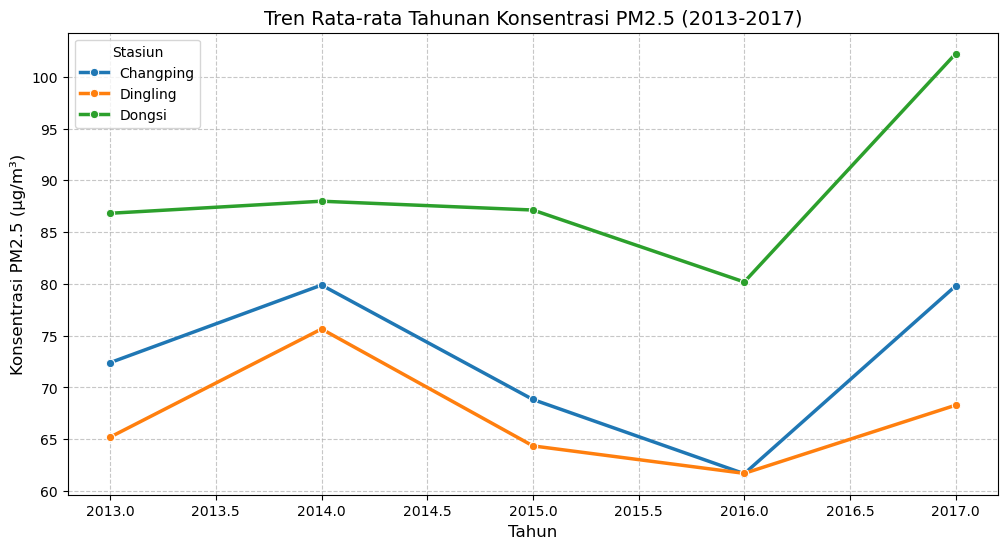

In [56]:
# Menghitung rata-rata tahunan
annual_pm25 = all_stations_df.groupby(['year', 'station'])['PM2.5'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=annual_pm25, x='year', y='PM2.5', hue='station', marker='o', linewidth=2.5)

plt.title('Tren Rata-rata Tahunan Konsentrasi PM2.5 (2013-2017)', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Konsentrasi PM2.5 (µg/m³)', fontsize=12)
plt.legend(title='Stasiun')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2:

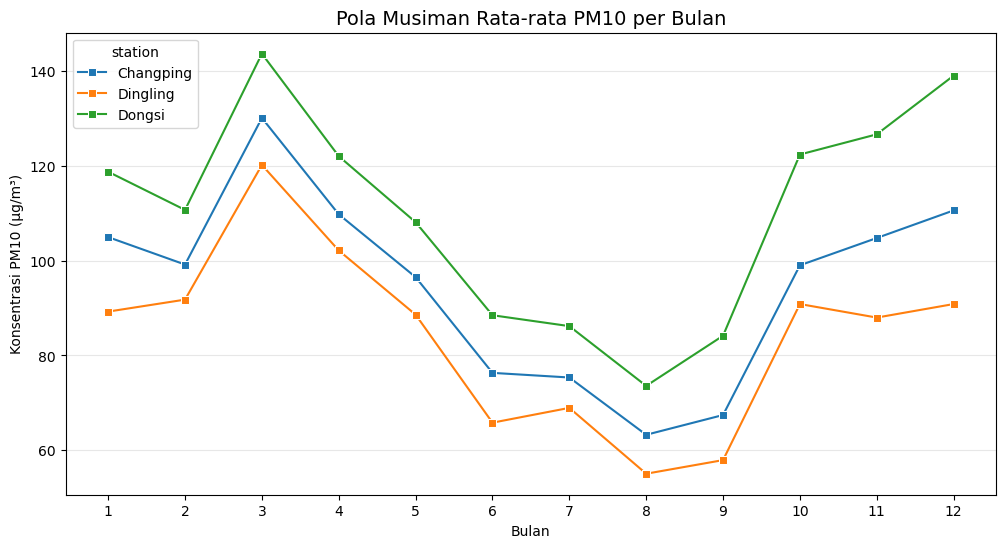

In [57]:
# Visualisasi Musiman PM10
monthly_pm10 = all_stations_df.groupby(['month', 'station'])['PM10'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_pm10, x='month', y='PM10', hue='station', marker='s')
plt.title('Pola Musiman Rata-rata PM10 per Bulan', fontsize=14)
plt.xticks(range(1, 13))
plt.xlabel('Bulan')
plt.ylabel('Konsentrasi PM10 (µg/m³)')
plt.grid(axis='y', alpha=0.3)
plt.show()

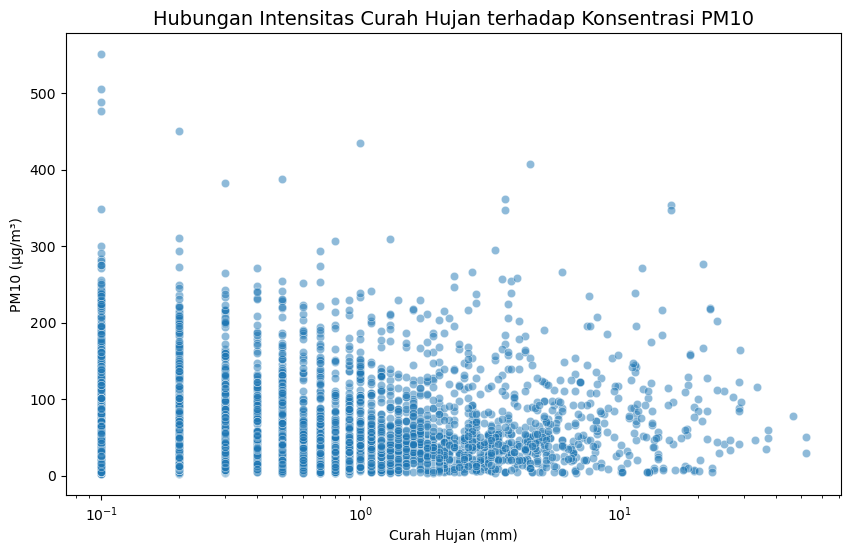

In [58]:
# Pengaruh RAIN terhadap PM10 (Analisis Korelasi)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_stations_df[all_stations_df['RAIN'] > 0], x='RAIN', y='PM10', alpha=0.5)
plt.title('Hubungan Intensitas Curah Hujan terhadap Konsentrasi PM10', fontsize=14)
plt.xlabel('Curah Hujan (mm)')
plt.ylabel('PM10 (µg/m³)')
plt.xscale('log') # Menggunakan skala log agar sebaran lebih terlihat
plt.show()

**Insight:**
- Kualitas udara di ketiga stasiun mengalami fluktuasi signifikan dengan titik terburuk (konsentrasi PM2.5 tertinggi) terjadi pada tahun 2017, di mana stasiun Dongsi mencatatkan tingkat polusi yang jauh lebih tinggi dibandingkan Changping dan Dingling.
- Terdapat pola musiman yang konsisten di mana polusi PM10 melonjak pada Maret dan akhir tahun, namun menurun drastis pada bulan Juli-Agustus karena intensitas curah hujan yang lebih tinggi terbukti efektif meluruhkan konsentrasi polutan di udara.

In [59]:
all_stations_df.to_csv("all_stations_df.csv", index=False)

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2